In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Read the CSV data into a Pandas DataFrame
df = pd.read_csv("AusApparalSales4thQrt2020.csv")
df

df.tail()
df.shape


(7560, 6)

In [19]:
df.head()


,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [58]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day of Week'] = df['Date'].dt.dayofweek

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         7560 non-null   datetime64[ns]
 1   Time         7560 non-null   object        
 2   State        7560 non-null   object        
 3   Group        7560 non-null   object        
 4   Unit         7560 non-null   int64         
 5   Sales        7560 non-null   int64         
 6   Month        7560 non-null   int32         
 7   Year         7560 non-null   int32         
 8   Day of Week  7560 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(3)
memory usage: 443.1+ KB


In [92]:

# Data Inspection - Check for missing values
print("Missing values:")
print(df.isnull().sum())  # Print number of missing values in each column


Missing values:
Date           0
Time           0
State          0
Group          0
Unit           0
Sales          0
Month          0
Year           0
Day of Week    0
Quarter        0
Week           0
dtype: int64


In [93]:
print("\nNon-missing values:")
print(df.notna().sum())  # Print number of non-missing values in each column



Non-missing values:
Date           7560
Time           7560
State          7560
Group          7560
Unit           7560
Sales          7560
Month          7560
Year           7560
Day of Week    7560
Quarter        7560
Week           7560
dtype: int64


In [94]:
df.describe()

,Date,Unit,Sales,Month,Year,Day of Week,Quarter,Week
count,7560,7560.000000,7560.000000,7560.000000,7560.0,7560.000000,7560.0,7560.0
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,11.000000,2020.0,2.977778,4.0,46.455556
min,2020-10-01 00:00:00,2.000000,5000.000000,10.000000,2020.0,0.000000,4.0,40.0
25%,2020-10-23 00:00:00,8.000000,20000.000000,10.000000,2020.0,1.000000,4.0,43.0
50%,2020-11-15 12:00:00,14.000000,35000.000000,11.000000,2020.0,3.000000,4.0,46.5
75%,2020-12-08 00:00:00,26.000000,65000.000000,12.000000,2020.0,5.000000,4.0,50.0
max,2020-12-30 00:00:00,65.000000,162500.000000,12.000000,2020.0,6.000000,4.0,53.0
std,NaN,12.901403,32253.506944,0.816551,0.0,2.000009,0.0,3.786662


In [24]:
df['Date'].min()


Timestamp('2020-10-01 00:00:00')

In [25]:
df['Date'].max()

Timestamp('2020-12-30 00:00:00')

In [29]:
# Data Normalization (on 'Sales' column for better comparison across states)
scaler = StandardScaler()
df_norm = df.copy()  # Create a copy for normalization

# Normalize Sales column
df_norm["Sales_Normalized"] = scaler.fit_transform(df_norm[["Sales"]])

# Normalize Units column (assuming it's numerical)
df_norm["Unit_Normalized"] = scaler.fit_transform(df_norm[["Unit"]])
df_norm.head()


,Date,Time,State,Group,Unit,Sales,Sales_Normalized,Unit_Normalized
0,2020-10-01,Morning,WA,Kids,8,20000,-0.775581,-0.775581
1,2020-10-01,Morning,WA,Men,8,20000,-0.775581,-0.775581
2,2020-10-01,Morning,WA,Women,4,10000,-1.085645,-1.085645
3,2020-10-01,Morning,WA,Seniors,15,37500,-0.232969,-0.232969
4,2020-10-01,Afternoon,WA,Kids,3,7500,-1.163162,-1.163162


In [95]:
sales_by_state_time = df.groupby(['State', 'Time'])['Sales'].sum()
print("Total Sales by State and Time:")
print(sales_by_state_time)


Total Sales by State and Time:
State  Time      
 NSW    Afternoon    25110000
        Evening      24712500
        Morning      25147500
 NT     Afternoon     7510000
        Evening       7627500
        Morning       7442500
 QLD    Afternoon    11347500
        Evening      10632500
        Morning      11437500
 SA     Afternoon    20025000
        Evening      19367500
        Morning      19465000
 TAS    Afternoon     7670000
        Evening       7565000
        Morning       7525000
 VIC    Afternoon    35062500
        Evening      34880000
        Morning      35622500
 WA     Afternoon     7282500
        Evening       7302500
        Morning       7567500
Name: Sales, dtype: int64


Total Sales by State:
State
 NSW     74970000
 NT      22580000
 QLD     33417500
 SA      58857500
 TAS     22760000
 VIC    105565000
 WA      22152500
Name: Sales, dtype: int64


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

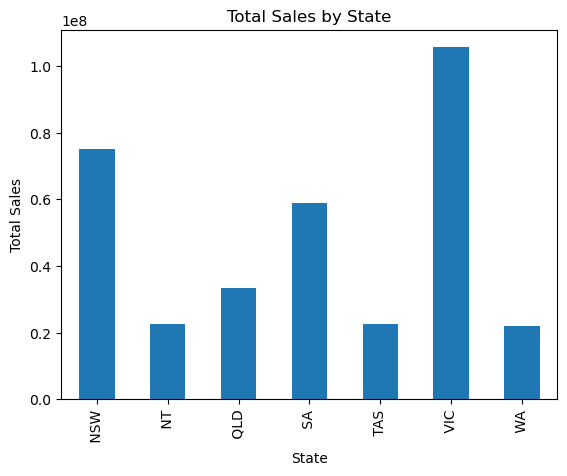

In [40]:

# GroupBy Function - Usage depends on your specific needs
total_sales_by_state = df.groupby("State")["Sales"].sum()
print("Total Sales by State:")
print(total_sales_by_state)
plt.figure()
total_sales_by_state.plot(kind="bar",)
plt.title("Total Sales by State")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.tight_layout



Total Sales by Group:
Group
 Kids       85072500
 Men        85750000
 Seniors    84037500
 Women      85442500
Name: Sales, dtype: int64


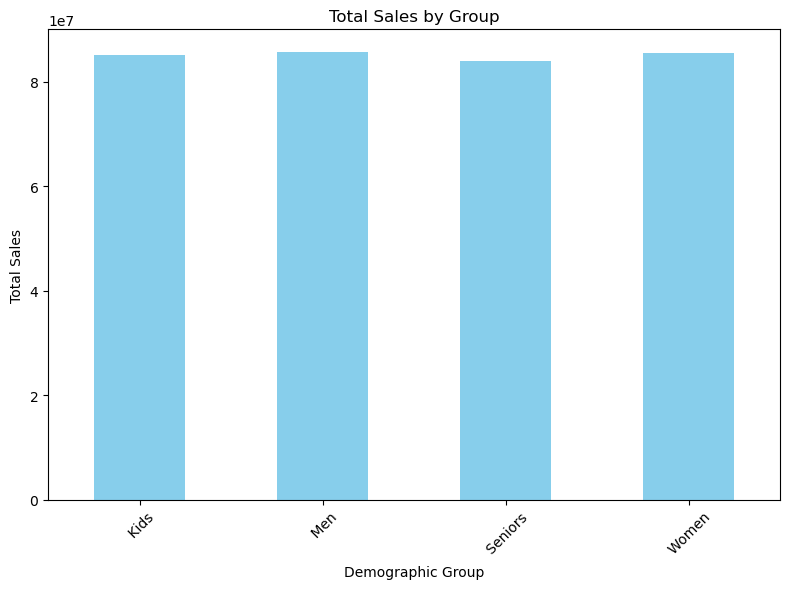

In [48]:
total_sales_by_group = df.groupby("Group")["Sales"].sum()

# Print Results
print("Total Sales by Group:")
print(total_sales_by_group)

# Visualization (Total Sales by Group)
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
total_sales_by_group.plot(kind="bar", color="skyblue")
plt.title("Total Sales by Group")
plt.xlabel("Demographic Group")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Average Unit Sales per Demographic Group:
Group
 Kids       18.004762
 Men        18.148148
 Seniors    17.785714
 Women      18.083069
Name: Unit, dtype: float64


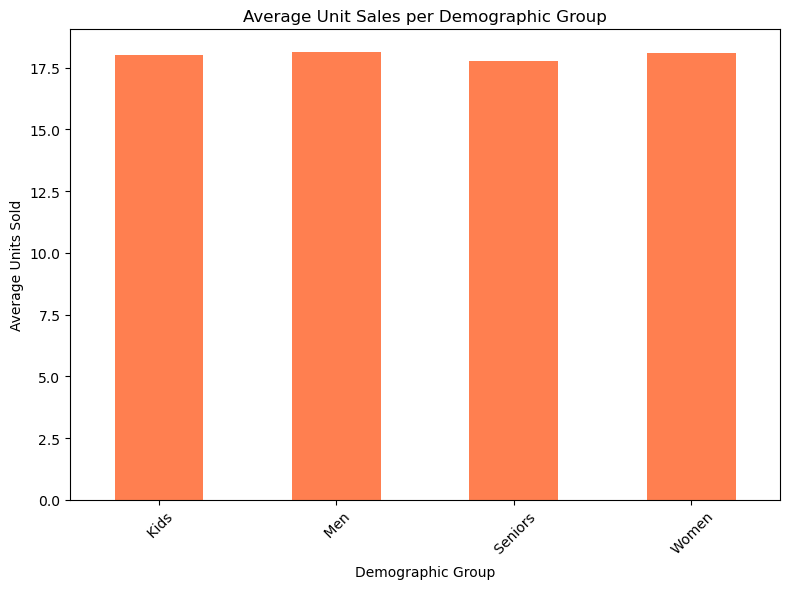

In [35]:
# Average Unit per Demographic Group
avg_units_by_group = df.groupby("Group")["Unit"].mean()
print("\nAverage Unit Sales per Demographic Group:")
print(avg_units_by_group)
plt.figure(figsize=(8, 6))
avg_units_by_group.plot(kind="bar", color="coral")
plt.title("Average Unit Sales per Demographic Group")
plt.xlabel("Demographic Group")
plt.ylabel("Average Units Sold")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




Monthly Sales by State:
Month  December  November   October
State                              
 NSW   28472500  21490000  25007500
 NT     9100000   5257500   8222500
 QLD   14187500   8110000  11120000
 SA    22715000  15532500  20610000
 TAS    9200000   5545000   8015000
 VIC   42592500  29530000  33442500
 WA     9062500   5217500   7872500


<Figure size 1000x600 with 0 Axes>

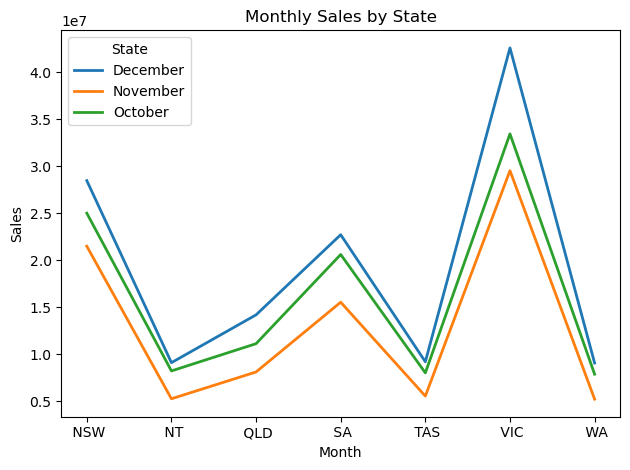

In [37]:
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()  # Extract month name

# Monthly Sales by State
monthly_sales_by_state = df.groupby(["State", "Month"])["Sales"].sum()
print("\nMonthly Sales by State:")
print(monthly_sales_by_state.unstack())  
plt.figure(figsize=(10, 6))
monthly_sales_by_state.unstack().plot(linewidth=2)
plt.title("Monthly Sales by State")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title="State")
plt.tight_layout()
plt.show()

In [43]:
print("Descriptive Statistics:")
sales_stats = df["Sales"].describe()
unit_stats = df["Unit"].describe()
print('Sales_stats: ',"\n",sales_stats, "\n",'unit_stats:',"\n", unit_stats)



Descriptive Statistics:
Sales_stats:  
 count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64 
 unit_stats: 
 count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64


In [46]:
# Group with Highest and Lowest Sales
highest_sales_group = df.groupby("Group")["Sales"].sum().idxmax()
lowest_sales_group = df.groupby("Group")["Sales"].sum().idxmin()

# Access Total Sales for Each Group
highest_sales_value = df.groupby("Group")["Sales"].sum().max()
lowest_sales_value = df.groupby("Group")["Sales"].sum().min()

print("\nGroup with Highest Sales:", highest_sales_group, ":",highest_sales_value)
print("\nGroup with Lowest Sales:", lowest_sales_group,":",lowest_sales_value)


Group with Highest Sales:  Men : 85750000

Group with Lowest Sales:  Seniors : 84037500


In [47]:
highest_sales_state = df.groupby("State")["Sales"].sum().idxmax()
lowest_sales_state = df.groupby("State")["Sales"].sum().idxmin()

# Access Total Sales for Each State
highest_sales_value = df.groupby("State")["Sales"].sum().max()
lowest_sales_value = df.groupby("State")["Sales"].sum().min()

# Print Results with Formatting
print("\nState with Highest Sales:", highest_sales_state, ":",highest_sales_value)
print("\nState with Lowest Sales:", lowest_sales_state, ":",lowest_sales_value)


State with Highest Sales:  VIC : 105565000

State with Lowest Sales:  WA : 22152500


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
 6   Month   7560 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 413.6+ KB


In [65]:
weekly_sales = df.groupby(df['Date'].dt.strftime('%U'))['Sales'].sum()
monthly_sales = df.groupby(df['Date'].dt.month_name())['Sales'].sum()

# Assuming quarters start in January, April, July, and October
def quarter(month):
    return (month - 1) // 3 + 1

# Add 'Quarter' column
df['Quarter'] = df['Date'].dt.month.apply(quarter)

# Group by Quarter for Sales
quarterly_sales = df.groupby('Quarter')['Sales'].sum()

# Group by Quarter for Sales
quarterly_sales = df.groupby('Quarter')['Sales'].sum()

# Daily Sales
daily_sales = df.groupby(df['Date'])['Sales'].sum()

print("\nDaily Sales:")
print(daily_sales)

print("\nWeekly Sales:")
print(weekly_sales)

print("\nMonthly Sales:")
print(monthly_sales)

print("\nQuarterly Sales:")
print(quarterly_sales)

# Textual Summary (replace with your analysis)
print("\n**Sales Analysis:**")


Daily Sales:
Date
2020-10-01    3720000
2020-10-02    3715000
2020-10-03    3890000
2020-10-04    3720000
2020-10-05    3862500
               ...   
2020-12-26    4715000
2020-12-27    4637500
2020-12-28    4595000
2020-12-29    4607500
2020-12-30    4590000
Name: Sales, Length: 90, dtype: int64

Weekly Sales:
Date
39    11325000
40    26850000
41    26860000
42    26592500
43    22662500
44    20675000
45    21260000
46    21367500
47    21110000
48    28797500
49    30980000
50    31807500
51    31585000
52    18430000
Name: Sales, dtype: int64

Monthly Sales:
Date
December    135330000
November     90682500
October     114290000
Name: Sales, dtype: int64

Quarterly Sales:
Quarter
4    340302500
Name: Sales, dtype: int64

**Sales Analysis:**


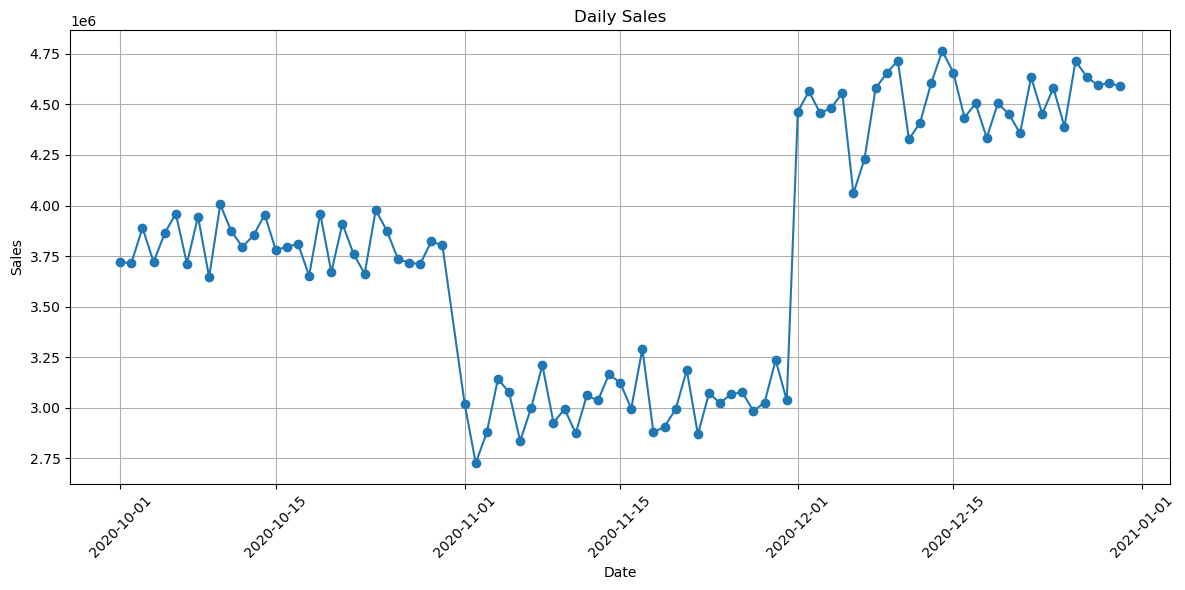

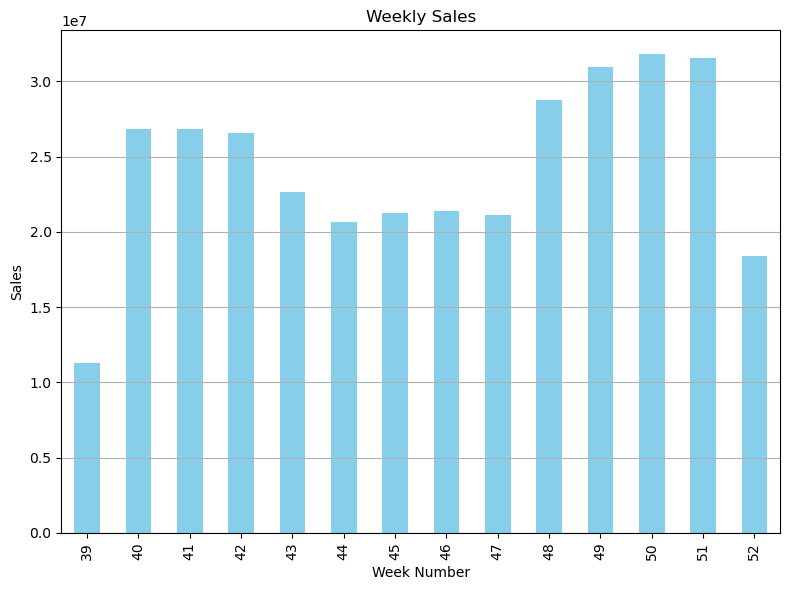

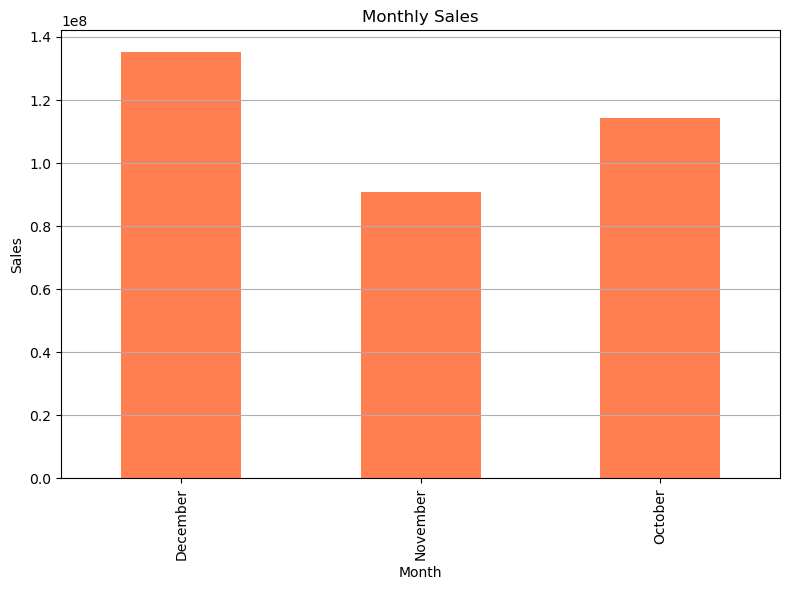

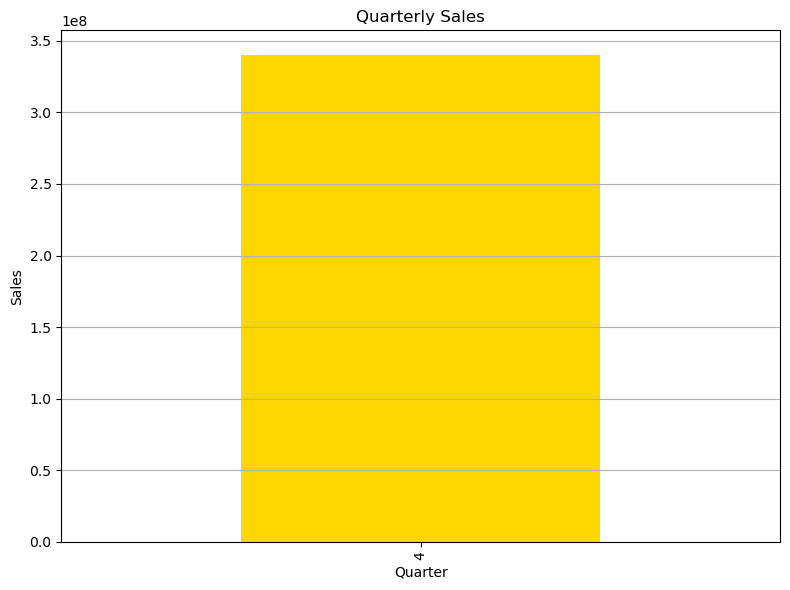

In [67]:
# Visualization

# Daily Sales Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title("Daily Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many dates
plt.tight_layout()
plt.show()

# Weekly Sales Bar Chart
plt.figure(figsize=(8, 6))
weekly_sales.plot(kind='bar', color='skyblue')
plt.title("Weekly Sales")
plt.xlabel("Week Number")
plt.ylabel("Sales")
plt.grid(axis='y')
plt.tight_layout()

# Monthly Sales Bar Chart
plt.figure(figsize=(8, 6))
monthly_sales.plot(kind='bar', color='coral')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(axis='y')
plt.tight_layout()


State-wise Sales Analysis by Demographic Group (Summed):
Group      Kids       Men   Seniors     Women
State                                        
 NSW   18587500  19022500  18187500  19172500
 NT     5700000   5762500   5465000   5652500
 QLD    8510000   8392500   8190000   8325000
 SA    14515000  14655000  14717500  14970000
 TAS    5775000   5757500   5650000   5577500
 VIC   26360000  26407500  26315000  26482500
 WA     5625000   5752500   5512500   5262500


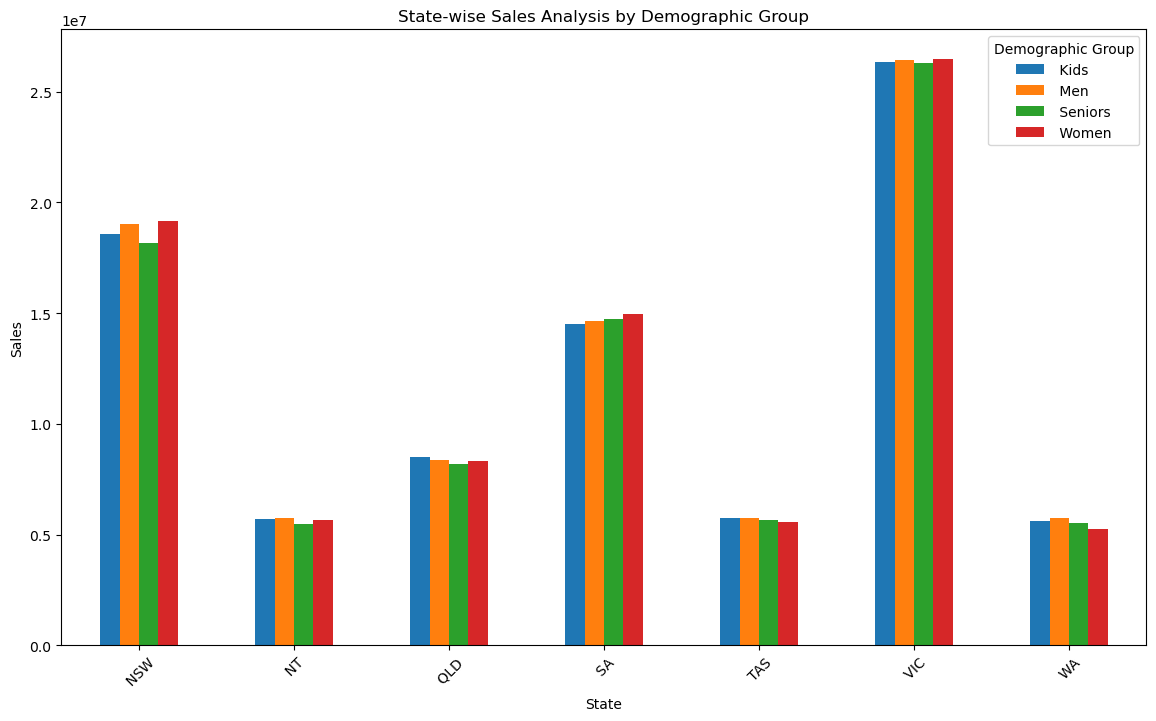

In [69]:
state_wise_sales = df.groupby(['State', 'Group'])['Sales'].sum().unstack()

# Print Results
print("State-wise Sales Analysis by Demographic Group (Summed):")
print(state_wise_sales)
state_wise_sales.plot(kind='bar', figsize=(14, 8))

# Adding title and labels
plt.title('State-wise Sales Analysis by Demographic Group')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Demographic Group')
plt.xticks(rotation=45)

# Display the plot
plt.show()

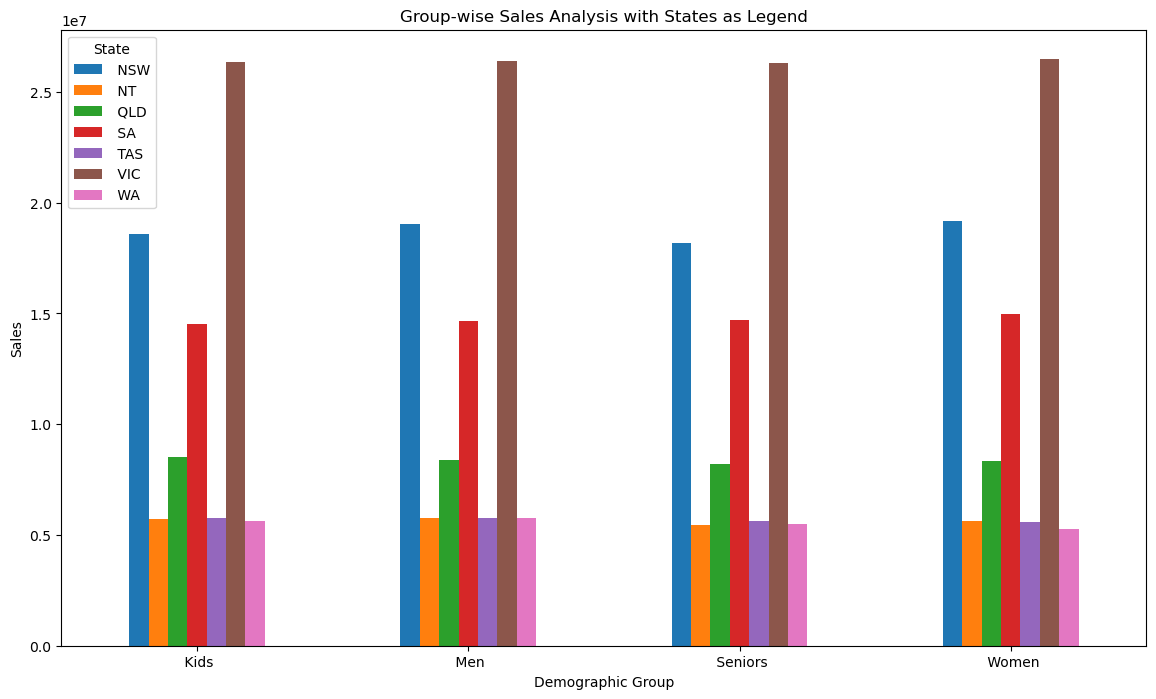

In [72]:
# Group by Group and State, then sum the Sales and unstack to create a pivot table
group_wise_sales = df.groupby(['Group', 'State'])['Sales'].sum().unstack()

# Plotting
group_wise_sales.plot(kind='bar', figsize=(14, 8))

# Adding title and labels
plt.title('Group-wise Sales Analysis with States as Legend')
plt.xlabel('Demographic Group')
plt.ylabel('Sales')
plt.legend(title='State')
plt.xticks(rotation=0)

# Display the plot
plt.show()

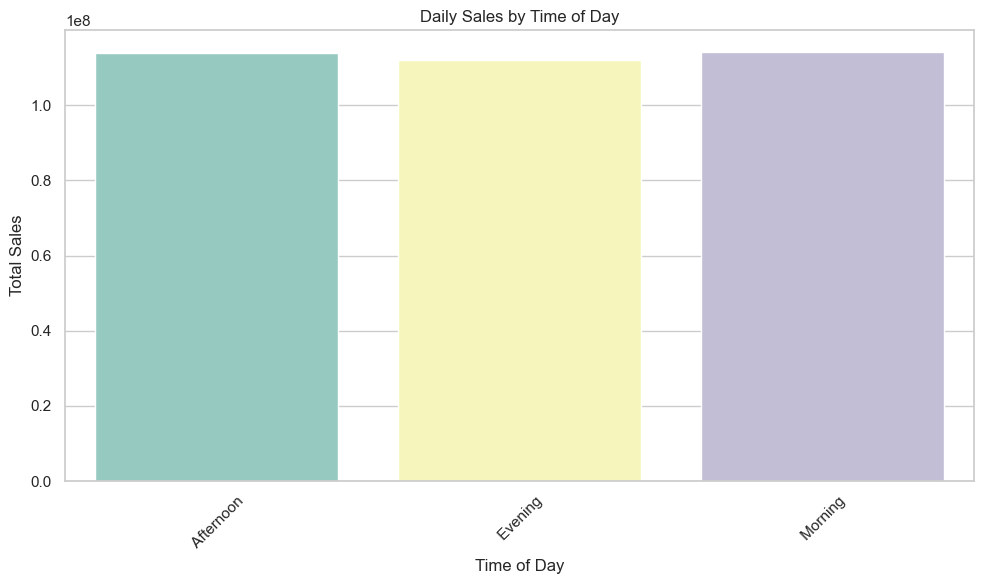

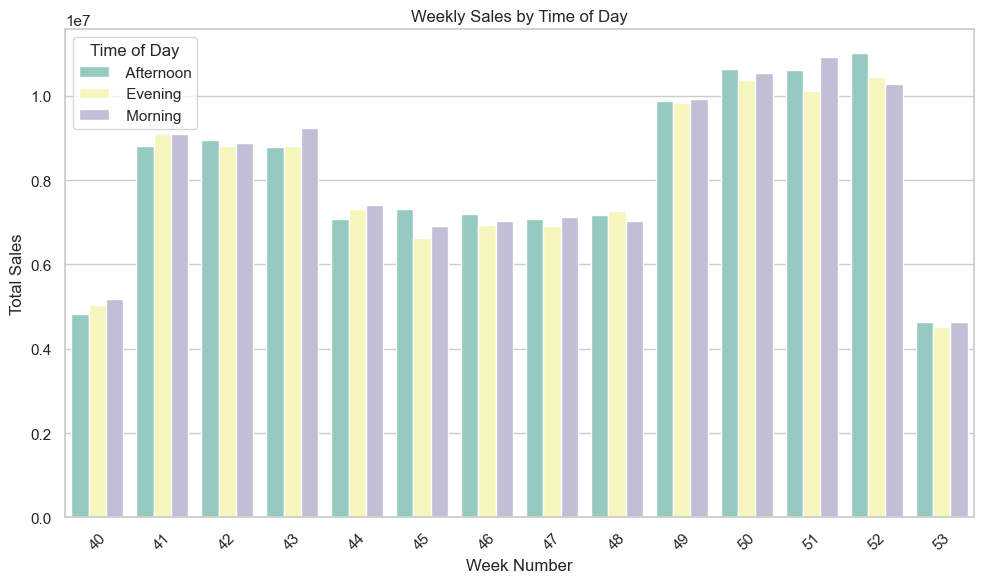

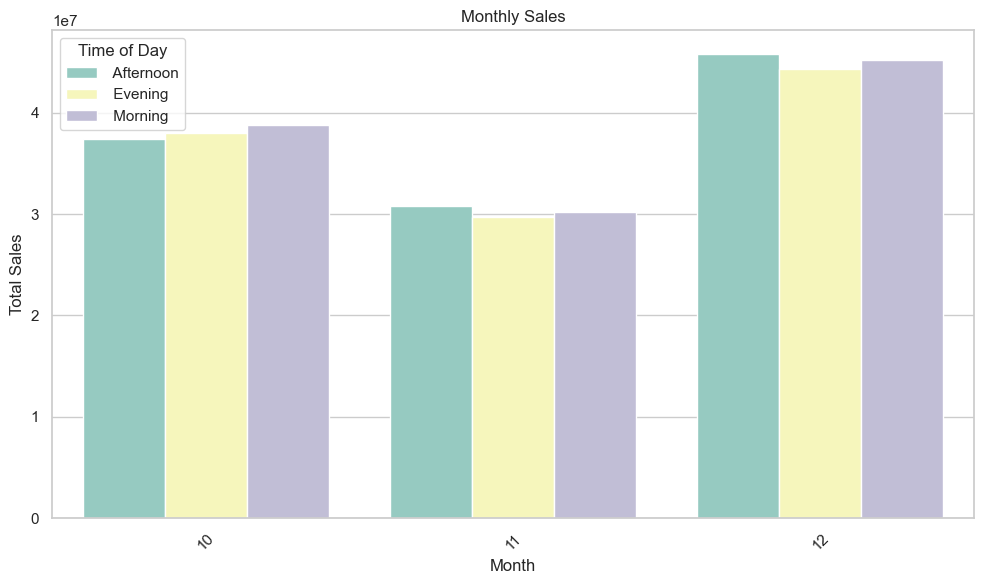

In [90]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Assuming a 'Time' column with categories: "morning", "afternoon", "evening", "night"

# Set the style for the plots
sns.set(style="whitegrid")

# Daily Sales Analysis by Time of Day
daily_sales_by_time = df.groupby('Time')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Time',
    y='Sales',
    data=daily_sales_by_time,
    palette='Set3'
)
plt.title('Daily Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Weekly Sales Analysis
df['Week'] = df['Date'].dt.isocalendar().week
weekly_sales_by_time = df.groupby(['Week', 'Time'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Week',
    y='Sales',
    hue='Time',
    data=weekly_sales_by_time,
    palette='Set3'
)
plt.title('Weekly Sales by Time of Day')
plt.xlabel('Week Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

# Monthly Sales Analysis
monthly_sales_by_time = df.groupby(['Month', 'Time'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Month',
    y='Sales',
    hue='Time',
    data=monthly_sales_by_time,
    palette='Set3'
)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()
